5350 Thesis in Economics

Andres Cruz 25199 & Klara Holmer 25037 

Code for Lower Secondary Year 9 + Upper Secondary Year 10

In [6]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 1 - Importing ExcelFiles and Concatenating DataFrames

# --- Upper Secondary School Year 10 --- 

# Defining the full path to the Excel file in the new folder
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/gymnasieskola.xlsx'

# Read all sheets at once into a dictionary
sheets = ['English', 'Mathematics', 'Swedish']
upper_secondary_year_10_data = pd.read_excel(pathname, sheet_name=sheets)

# Unpack the dictionary into separate variables if needed
upper_secondary_year_10_english_data = upper_secondary_year_10_data['English']
upper_secondary_year_10_mathematics_data = upper_secondary_year_10_data['Mathematics']
upper_secondary_year_10_swedish_data = upper_secondary_year_10_data['Swedish']

# --- Lower Secondary School Year 9 --- 

# Defining the full path to the Excel file in the new folder
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/grundskola.xlsx'

# Read all sheets at once into a dictionary
sheets = ['English', 'Mathematics', 'Swedish']
lower_secondary_year_9_data = pd.read_excel(pathname, sheet_name=sheets)

# Unpack the dictionary into separate variables if needed
lower_secondary_year_9_english_data = lower_secondary_year_9_data['English']
lower_secondary_year_9_mathematics_data = lower_secondary_year_9_data['Mathematics']
lower_secondary_year_9_swedish_data = lower_secondary_year_9_data['Swedish']

# --- Concatenating --- 

# Engelska
school_data_english = pd.concat([upper_secondary_year_10_english_data, lower_secondary_year_9_english_data], ignore_index=True)

# Matematik
school_data_mathematics = pd.concat([upper_secondary_year_10_mathematics_data, lower_secondary_year_9_mathematics_data], ignore_index=True)

# Svenska
school_data_swedish = pd.concat([upper_secondary_year_10_swedish_data, lower_secondary_year_9_swedish_data], ignore_index=True)

# --- Exporting --- 

# Defining the full path where the Excel file will be saved
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/school_data.xlsx'

# Exporting all the tables created into one Excel File 
with pd.ExcelWriter(pathname) as writer:
    school_data_english.to_excel(writer, sheet_name = 'English', index=False)
    school_data_mathematics.to_excel(writer, sheet_name = 'Mathematics', index=False)
    school_data_swedish.to_excel(writer, sheet_name = 'Swedish', index=False)

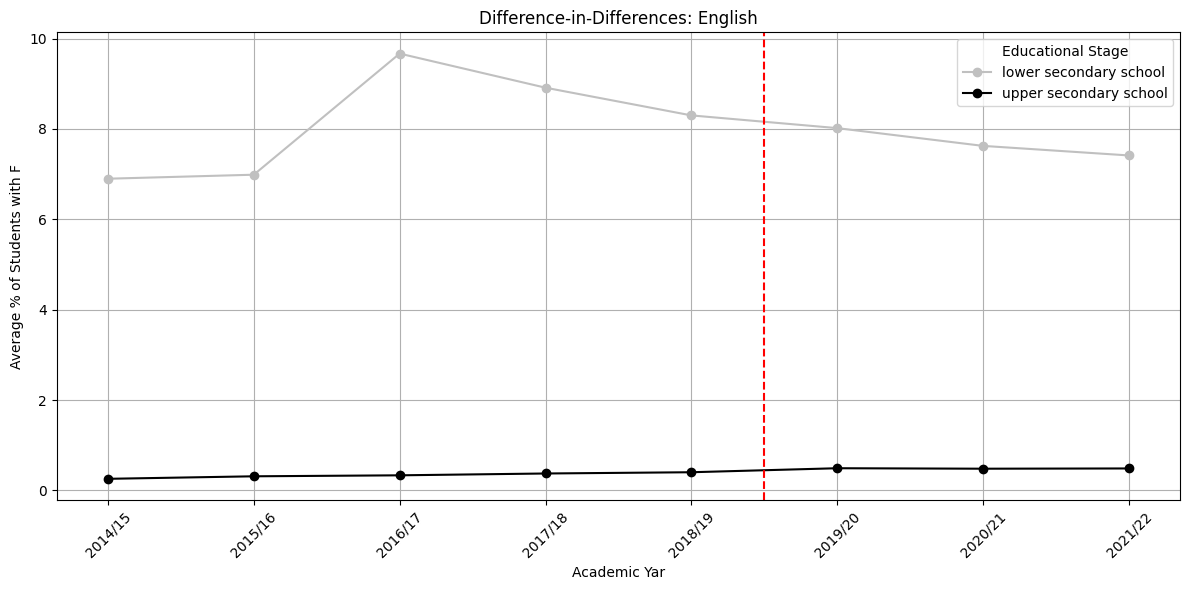

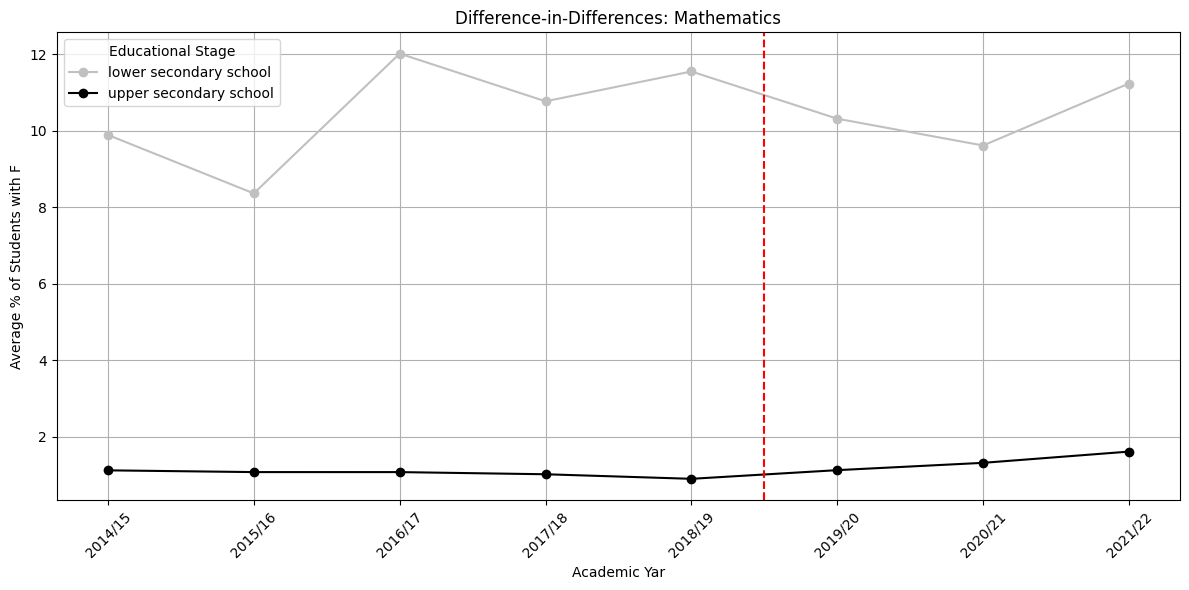

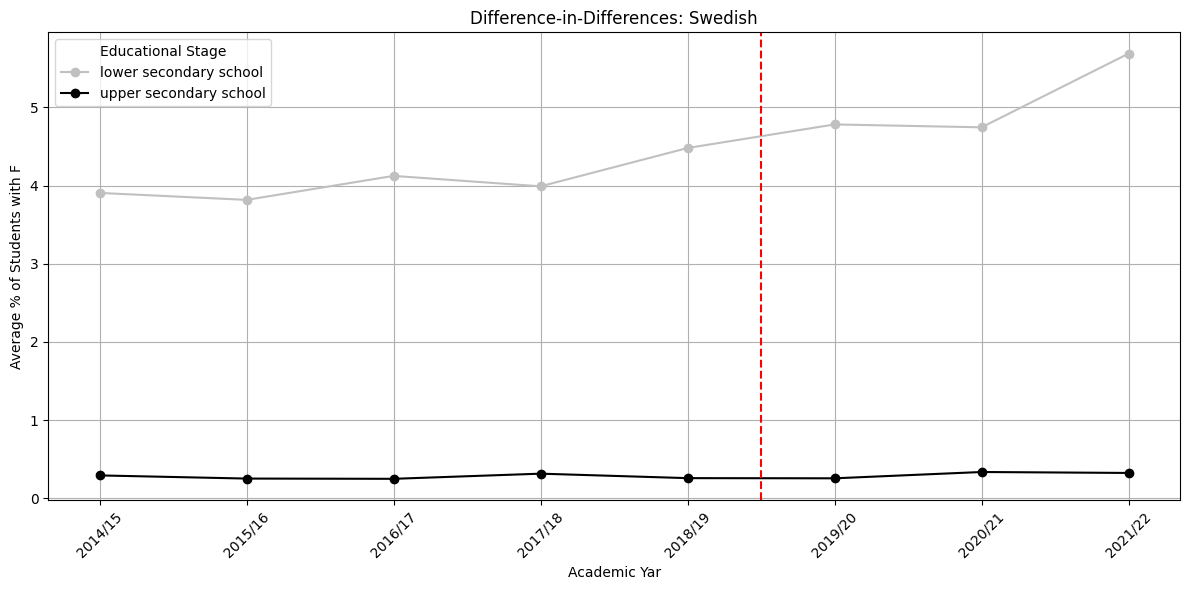

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot_did(data, variable, title, treatment_year=19.5):
    """
    Processes the dataset, ensuring all years are represented, and generates a Difference-in-Differences plot.
    
    Parameters:
    - data: Pandas DataFrame containing the data. It must include a 'läsår' column with string values in the format 'yyyy/yy'.
    - variable: Column name for the dependent variable to be plotted.
    - title: Title for the plot.
    - treatment_year: The numeric part (yy) of the läsår when the treatment/intervention occurred.
    """
    
    # Create a numeric version of 'academic_year' using the yy part
    data['year_numeric'] = data['academic_year'].apply(lambda x: int(x.split('/')[1]))
    
    # Aggregate data by year_numeric, academic_year, and school type (educational_stage)
    grouped_df = data.groupby(['year_numeric', 'academic_year', 'educational_stage'], as_index=False)[variable].mean()
    
    # Create a full range of numeric years for continuity in the plot
    all_years = pd.DataFrame({
        'year_numeric': range(grouped_df['year_numeric'].min(), grouped_df['year_numeric'].max() + 1)
    })
    
    # Create a mapping from numeric year to academic_year using available data
    mapping = dict(zip(grouped_df['year_numeric'], grouped_df['academic_year']))
    
    # Generate the plot
    plt.figure(figsize=(12, 6))
    
    for educational_stage, subset in grouped_df.groupby('educational_stage'):
        # Merge with all_years to fill in any missing years
        subset = all_years.merge(subset, on='year_numeric', how='left')
        subset['educational_stage'] = educational_stage  # preserve educational_stage
        
        # Assign colors: blue for gymnasieskola, green for grundskola
        if educational_stage.lower() == 'upper secondary school':
            color = 'black'
        elif educational_stage.lower() == 'lower secondary school':
            color = 'silver'
        else:
            color = None  # default color for any other skolform
        
        # Plot using the numeric year for the x-axis
        plt.plot(subset['year_numeric'], subset[variable], marker='o', linestyle='-', label=educational_stage, color=color)
    
    # Add a vertical line indicating the treatment year
    plt.axvline(x=treatment_year, color='red', linestyle='--')
    
    # Set custom x-ticks: use the numeric years but label them with the läsår format.
    xticks = all_years['year_numeric']
    xlabels = [mapping.get(x, f"{2000 + x - 1}/{x:02d}") for x in xticks]
    plt.xticks(xticks, xlabels, rotation=45)
    
    # Configure the plot
    plt.title(f'Difference-in-Differences: {title}')
    plt.xlabel('Academic Yar')
    plt.ylabel('Average % of Students with F')
    plt.legend(title='Educational Stage')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply the function to the provided dataframes
process_and_plot_did(school_data_english, 'share_students_F_eng', 'English')
process_and_plot_did(school_data_mathematics, 'share_students_F_ma', 'Mathematics')
process_and_plot_did(school_data_swedish, 'share_students_F_sv', 'Swedish')

Svenska som andra språk!!!!!!!!!!!!!!!!!!!!!!!!